# Statistical Analysis
### Fall 2020

In [18]:
# Run this cell to make sure you have the requirements
# It should return 0. Then, comment it out. 

import os
os.system("pip3 install -r requirements.txt")

0

### Major Topics:
* Inference
  - Estimation
  - Confidence Intervals
  - Central Limit Theorem
  - Benefits of Large Sample Sizes
* Hypothesis Testing
* Regression

# Inference 
## Estimation
When conducting data analysis, one is often interested in a phenomenon of interest. They might want to know the average amount of water that Harvard students drink each day, the maximal number of trips to Mount Auburn that each Harvard first-year took, or the probability that they have covid given a variety of factors, for example.

In each of these cases, there is the true “god-given” value: this is the estimand  𝜃 . Before sampling data, the exact crystallization of the data is a random variable  𝑋 , and all of the  𝑛  data can be represented by  𝑋⃗ ∈𝑛 . One does not know if the first person they survey will have drank 14 or 16 oz of water, or something else entirely. Once the value does crystalize, it is often notationally referred to as  𝑦 . An estimator \hat{\theta} is the output of a function  𝑔(𝑋⃗ )  that attempts to estimate the estimand  𝜃 . Because an estimator is a function of unobserved data, it is also a random variable. After observing the data, the estimate is the output of the function  𝑔(𝑦⃗ ) .

In [5]:
import numpy as np
from numpy import random
import math

# Define parameters
estimand = p = 0.7 # The true god-given value that generates the data
sample_size = ss = 100 # sample size 

# Generate data
x = random.binomial(n=1, p=estimand, size=ss)
print(x) 

# Define estimator
estimator = x.sum()/ss # The mean of the data 

# Infer parameters 
estimate = p_hat = x.sum()/ss # Data has crystallized, so this is an estimate
standard_error = math.sqrt(p_hat*(1-p_hat)/ss) # Variance of binomial mean is p(1-p)/n
print("Estimate: " + str(estimate))
print("Standard Error " + str(round(standard_error, 3)))

[0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0]
Estimate: 0.7
Standard Error 0.046


If the phenomenon of interest is the daily average water intake of Harvard students, then the “true” value, the estimand $\theta$, may be some irrational number close to 64.43 oz, which could only be known if an analyst had perfect information and measurements about the exact water intake of every student. An estimator of $\theta$ may be the mean. In addition to the point estimate, the estimator has an associated standard error $s = \sqrt{Variance(\hat{\theta})}$, where the “e” in error is for “estimator.” In practice, standard error can be estimated with the standard deviation of the sample, which many packages can calculate.  

Similarly, an estimator is unbiased if its expectation is the estimand. Formally, we define bias to be $\textrm{bias}(\hat{\theta}) = \mathbb{E}_{\theta}(\hat{\theta) - \theta. The mean squared error (MSE) is equivalent to the sum of the squared bias and standard errors, the proof of which is beyond the scope of the docs. When designing experiments, statisticians often have to tradeoff bias and variance to minimize mean squared error. 


In [6]:
# Bias of sample mean
bias = estimate - estimand 
print("Bias 1: " + str(round(bias, 3)))

# MSE of sample mean 
mse = bias**2 + standard_error**2 
print("MSE 1: " + str(round(mse, 3)))


Bias 1: 0.0
MSE 1: 0.002


Ideally, this estimate would converge to the estimand for asymptotically large values of $n$. We call this consistency: an estimator $\hat{\theta}$ is consistent if $\hat{\theta} \overset{p}{\longrightarrow} {\theta}.$. An estimator can be consistent but biased (e.g., estimating the mean with $\sum{n} x_n + \frac{1}{n}$) and inconsistent but unbiased (e.g., estimating the mean with $g(\vec{X}) = x_1 \forall n \geq 2$). 

In [7]:
# Inconsistent but Unbiased

# Estimator: The first data point
estimator2 = p_hat2 = x[0] 
standard_error2 = math.sqrt(p_hat2*(1-p_hat2)*sample_size)

# Evaluations: 
# E(x_1) = mean(x) = p, so this estimator is unbiased (good)
# But x_1 -/-> p as n --> infinity, so this estimator is NOT consistent (bad) 
bias2 = p_hat2 - estimand
mse2 = bias2**2 + standard_error2**2

print("Estimate 2: " + str(estimator2))
print("Standard Error 2: " + str(standard_error2))
print("Bias 2: " + str(round(bias2, 3)))
print("MSE 2: " + str(round(mse2, 3)))


# Consistent but Biased

# Estimator: The mean + 1/n
estimator3 = p_hat3 = x.sum()/ss + 1/ss
standard_error3 = math.sqrt(p_hat3*(1-p_hat3)/sample_size)

# Evaluations: 
# E(mean(x) + 1/n) = p + 1/n =/= p, so this estimator is biased (bad)
# But p + 1/n --> p as n --> infinity, so this estimator IS consistent (good)
bias3 = p_hat3 - estimand
mse3 = bias3**2 + standard_error3**2

print("Estimate 3: " + str(p_hat3))
print("Standard Error 3: " + str(round(standard_error3, 3)))
print("Bias 3: " + str(round(bias3, 3)))
print("MSE 3: " + str(round(mse3, 3)))



Estimate 2: 0
Standard Error 2: 0.0
Bias 2: -0.7
MSE 2: 0.49
Estimate 3: 0.71
Standard Error 3: 0.045
Bias 3: 0.01
MSE 3: 0.002


When doing work in HODP, it is important to be cognizant about as many potential sources of bias as possible whenever collecting or analyzing data and to choose, as best as possible, consistent estimators of a phenomenon of interest. 

## Confidence Intervals 

Point estimates and standard errors are great fits for some phenomenon of interest, but sometimes it is better to have a range of values that describe possible values a fixed yet unknown estimand $\theta$ could take. In the frequentist paradigm, where probabilities describe frequencies, these ranges are called confidence intervals: formally, a confidence interval of an estimand $\theta$ is an interval $C_n = (a,b)$ where the bounds are functions of the data such that $$\mathbb{P}_{\theta}(\theta \in C_n) \geq 1 - \alpha \textrm{for all} \theta \in \Theta$$ where $\Theta$ is the parameter space and $\alpha$ is the confidence level. 



In [8]:
# Confidence Interval 

import scipy.stats

alpha = 0.05 # arbitrarily define alpha level
confidence_level = 1 - alpha

normal_025_quantile = a = scipy.stats.norm(0, 1).ppf(alpha/2)
normal_975_quantile = b = scipy.stats.norm(0, 1).ppf(1 - alpha/2)

print("Normal Quantiles: " + str(a) +  ", " + str (b))
CI = np.array([estimate + a*standard_error, estimate + b*standard_error])

print("Mean: " + str(estimate))
print("St. Error: " + str(round(standard_error, 3))) 
print("Confidence Internal: " + np.array_str(CI))



Normal Quantiles: -1.9599639845400545, 1.959963984540054
Mean: 0.7
St. Error: 0.046
Confidence Internal: [0.61018317 0.78981683]


Because the interval is a function of the data and therefore random, a correct interpretation of a 95% confidence level (with the arbitrary confidence level of 0.05 chosen for its popularity) is that the random interval would contain the true estimand in 95% of its crystallizations after observing the data. 


In [9]:
# How often does this random interval cover the true value of 0.7?

def confidence_interval_95(estimand, sample_size, trials): 
    # estimand: the data-generating true value (integer)
    # sample_size: number of samples per trial (integer)
    # trials: number of experiments and confidence intervals (integer)
  
    x = np.array([random.binomial(n=1, p=estimand, size=sample_size) for i in range(trials)])
    p_hat = x.sum(axis=1)/sample_size # The mean of the data 
    st_error = np.sqrt(p_hat*(1-p_hat)/sample_size) # Variance of binomial mean is p(1-p)/n

    CI_lower = p_hat + a*st_error
    CI_upper = p_hat + b*st_error
    
    truths = (CI_lower < estimand) & (CI_upper > estimand) # Boolean array, true if in range
    
    # Frequency that confidence interval covers the estimand 
    coverage = np.sum(truths)/trials
    return coverage 

results = confidence_interval_95(0.7, 100, 10000)
print(str(round(results, 4)))

0.9518


Many times in practice, people will define a 95% confidence interval of the mean to be the range of values within two standard errors of the mean. This biggest assumption that this makes is that the parameter of interest is normally distributed. Fortunately, there are many cases in the real world where the normal distribution shows up. However, there are also many cases when it does not, so it good to know when it might appear. Generally, a reasonably large (in practice, this means loosely $n \geq 30$) sum of random variables sampled from an arbitrary random distribution is approximately normally distributed, per the central limit theorem (proof omitted), implying that the mean, or the sum scaled by a constant factor, is also approximately normally distributed. 


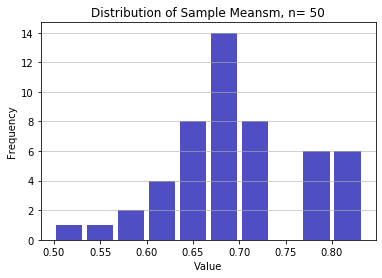

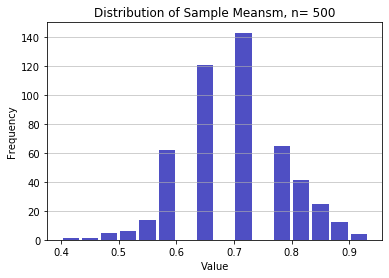

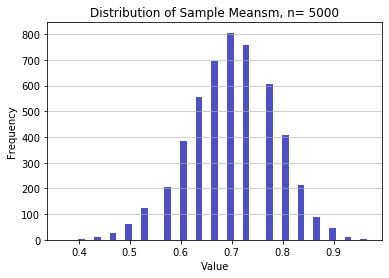

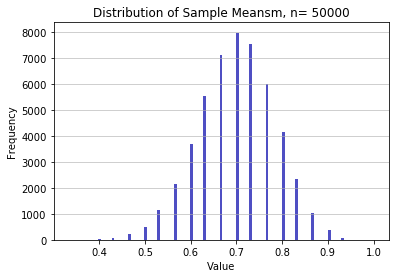

In [10]:
# Central Limit Theorem 
import matplotlib.pyplot as plt


def plot_means(estimand, sample_size, trials):
    # estimand: the data-generating true value (integer)
    # trials: number of the biggest sample size (integer)

    x = np.array([random.binomial(n=1, p=estimand, size=sample_size) for i in range(trials)])
    p_hat = x.sum(axis=1)/sample_size # The mean of the data 
    

    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=p_hat, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sample Meansm, n= %i' %trials)
    maxfreq = n.max()
    plt.show()
  
plot_means(0.7, 30, 50)
plot_means(0.7, 30, 500)
plot_means(0.7, 30, 5000)
plot_means(0.7, 30, 50000)


If ever unsure about the interpretation of statistics or confidence intervals, or whether the technique you are applying works well with your data, feel free to reach out to anyone in HODP in the slack. We recognize that people have varying degrees of expertise when it comes to statistics and drawing inferences from data, and we would love to help!  

# The Benefits of Large Samples

Sample size is one of the most important considerations in many experiments in statistics. More data is great for a lot of reasons: the Strong Law of Large Numbers states that sample means probabilistically converge to their true means, the central limit theorem starts to take stronger effect as asymptotics kick in, and, anytime either the variance or bias of an estimator is indirectly related to sample size, the mean squared error of an estimator decreases. 

Small sample sizes do not mean that an experiment is worthless; it just means that the statistician must be ever more careful when interpreting results. With this in mind, and the language from above, any statistician is ready to dive into analyzing their data. To help with claims about significance and causality, we have created the next docs: Hypothesis Testing. 

### Example

You are interested in determining the proportion of Harvard students with the Pros. You survey 250 people using a simple random sample. You obtain the following data. You decide to estimate the true proportion of students with the Pros by using the sample mean of your data (as your estimator). 

By writing a few lines of code in the following box, try your best to do the following. If you have a question or run into questions, shoot Asher or Leo a Zoom message! 

1. Estimate the true proportion of students who own AirPod Pros. 
2. Evaluate how confident you are in that estimate. 


In [11]:
# Paramters (do not change)
estimand = 0.98
ss = 1200

# AirPod Pro Data (do not change)
pros = random.binomial(n=1, p=estimand, size=ss)
print(x) 

# Estimate  (TO-DO)

# Confidnce Interval (TO-DO)



[0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0]


 # Hypothesis Testing
 
Hypothesis testing is a way to test and compare the validity of hypotheses.

## Fundumentals

Generally, say that we partition a parameter space $\Theta$ into two disjoint sets $\Theta_0$ and $\Theta_1$. Then we have two hypotheses: 

$H_0 : \theta \in \Theta_0$ and $H_1 : \theta \in \Theta_1$. 

We call $H_0$ the null hypothesis and $H_1$ the alternate hypothesis. 

To test these hypotheses, we need data. Let $X$ be a random variable representing our data. We test a hypothesis by finding a subset of outcomes $R$ in the range of $X$ called the rejection region. If $X \in R$, then we reject the null hypothesis: otherwise, we do not reject the null hypothesis. 


We never accept the null or alternative hypothesis, we only ever reject $H_0$ or retain $H_0$. 

We define the rejection region $R$ as the region where a test statistic $T$ is above a $critical value$: 

$R = {x : T(x) > c }$. 

The problem in hypothesis testing is of finding an appropriate test statistic $T$ and critical value $c$. 

Often, estimation and confidence intervals are better tools than hypothesis testing. Only use hypothesis testing when you want to test a well-defined hypothesis. 

## Errors 

There are two common errors: false positives, also referred to as type I errors, where we reject $H_0$ when $H_0$ is true, and false negatives, or type II errors, when we retain $H_0$ when $H_1$ is true. 


## Power 

The power function of a test with rejection region $R$ is $\beta(\theta) = P(X \in R)$. 

The size of a test is $\alpha = \sup \beta(\theta)$. The supremum of a set is the least upper bound. In other words, the size of a test is the largest probability of rejecting $H_0$ when $H_0$ is true. 

A test has level $\alpha$ if its size is less than or equal to $\alpha$. 

Note: A level $\alpha$ test rejects $H_0 : \theta = \theta_0$ if and only if the $1-\alpha$ confidence interval does not contain $\theta_0$. This is important for two reasons. Consider an example where we have a confidence interval and two values outside the interval, one close and one far. In the first case, the estimated value of $\theta$ is close to $\theta_0$, so the finding is probably of little value. In the second case, the estimated value is far, so the finding has scientific value. This shows that statistical significance does not imply scientific importance, and that confidence intervals can be more informative than tests. 


## P-values 

Often, researchers report more than whether or not they reject or retain the null. Usually, there is a the smallest $\alpha$ at which the test rejects the null: we call this the p-value. 


## Warnings! 

1) If a p-value is large, this has two interpretations: either $H_0$ is true, or $H_0$ is false but the test has low power. A large p-value is not strong evidence in favor of $H_0$.  

2)  The p-value is not the probability that the null hypothesis is true! The p-value is the probability under the null of observing a value of the test statistic the same as or more extreme than what was actually observed. 

3) Hypothesis testing is useful when there is evidence to reject $H_0$. If $H_0$ is the status quo, then this makes sense. We cannot use it to prove that $H_0$ is true. Failure to reject $H_0$ can occur because $H_0$ is true or because the test has low power.

4) P-values are also susceptible to p-hacking. This refers to making assumptions about data or tests that influence the p-value to be more favorable, usually to increase the chance of publication. 

5) As a final point about the problems with p-values, they are susceptible to decisions you make about when to collect data, even if that does not change the data you actually observe. For example, if you toss a coin $n=12$ times and observe  $s = 9$ heads, then if the null hypothesis is that the coin is fair, the one sided test statistic where $t(s) = s$ is 0.073, larger than the marginal 5% threshold.  If instead the modeler kept tossing the coin until they observed $n - s = 3$ tails, then the data-generating distribution becomes negative binomial and under this model and the same null hypothesis we get that the one sided p-value is 0.0327. All of a sudden, without changing the data, there is “significant” evidence of bias in the coin! Long live Bayes :). 



 # Regression
 
 
 ## Example 2
 
We frequently debate the causal effects of health insurance. Does health insurance affect your health? Health care costs? What might happen if we expand free health insurance to more people? *Are the insured better off than they would have been if they had not been insured?* Implicit here, as in our Harvard admissions example, is a "what-if" comparison: what if you did/did not have health insurance? Would you be as healthy?

Let's first consider the naiive comparison of the insured and uninsured, using data from the NHIS. First, import the dataset:

In [15]:
import pandas as pd

nhis = pd.read_csv("NHIS2009_clean.csv")
nhis.head()

,year,inc1,inc2,inc3,inc4,inc5,inc6,inc7,inc8,serial,...,hlth,inc,incmp,brooks,marradult,marradult_empl,adltempl,hi_hsb1,hi_hsb,n
0,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,3,...,4,19282.932,17500,1,1,0,1,NaN,0,2
1,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,3,...,4,19282.932,17500,1,1,1,1,0.0,0,2
2,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,5,...,3,167844.530,150000,1,1,1,2,1.0,1,2
3,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,5,...,3,167844.530,150000,1,1,1,2,NaN,1,2
4,2009,19282.932,41679.344,61102.973,85985.781,167844.53,25398.326,109725.27,70834.641,6,...,3,41679.344,42500,0,1,0,1,1.0,1,2


Next, let's use regression to compare the insured and uninsured. Regressions in Python are fairly easy to do -- we can use a Pandas dataframe to make it simple.

                            OLS Regression Results                            
Dep. Variable:                   hlth   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1451.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:50:16   Log-Likelihood:                -42043.
No. Observations:               29734   AIC:                         8.409e+04
Df Residuals:                   29731   BIC:                         8.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4977      0.022    200.809      0.0

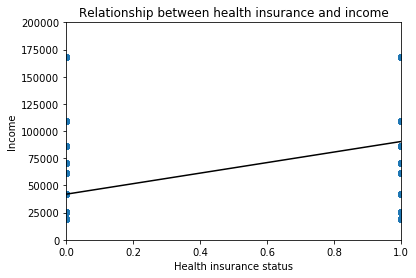

In [64]:
import statsmodels.api as sm

# we need to add a column of 1s to our dataset to give us a "constant"
nhis['const'] = 1
# endog is our outcome variable -- here, it's health
# exog is our X -- here, insurance status 
reg1 = sm.OLS(endog=nhis['hlth'], exog=nhis[['const', 'hi', 'age']], \
    missing='drop')
# next we need to fit our results
results = reg1.fit()
# finally, summarize:
print(results.summary())

## adding in controls shows our result seems to be fairly robust:
reg2 = sm.OLS(endog=nhis['hlth'], exog=nhis[['const', 'hi', 'age', 'inc', 'empl']], \
    missing='drop')
# next we need to fit our results
results2 = reg2.fit()
# finally, summarize:
print(results2.summary())

## We can fit a line to points on a graph. 
## Let's do that to look at income and health insurance:
# Dropping NA's is required to use numpy's polyfit
nhis_subset = nhis.dropna(subset=['inc', 'hi'])

X = nhis_subset['hi']
y = nhis_subset['inc']

# add markers
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o')

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

# hi is a binary from 0 to 1
ax.set_xlim([0,1])
# health can range from zero to 5
ax.set_ylim([0,200000])
ax.set_xlabel('Health insurance status')
ax.set_ylabel('Income')
ax.set_title('Relationship between health insurance and income')
plt.show()

## The RAND Health Insurance Experiment

NHIS results seem airtight -- even controlling for age, income, and employment, we have a meaningful difference in health outcomes from insurance! But something else might be at play ... 

In the 1970s, researchers at RAND randomly assigned 6,000 people to experimental insurance plans that required either no cost-sharing, a modest deductible, or 25%, 50%, or 95% coinsurance rates on subscribes. For more on this, check out Aron-Dine et. al (2013), which I've put in the repo. 

I've gone through and cleaned the dataset for you. The no cost-sharing "Free" plan is plantype 1, plantype 2 is the "Individual Deductible", plantype 3 are the two "Cost-Sharing", and plantype 4 is the 95% coinsurance "Catastrophic" plan.

Let's import the data and see what happened:

In [32]:
rand = pd.read_csv("randhie_health.csv")
rand.head()

/Users/saenger/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (284,288) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,person,site,instat,bfamily,bhh,xperson,baseld,enrterm,enrdate,annd,...,cap,capx,pfi,pfix,mhi,mhix,ghindx,ghindxx,merge2,merge3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,using only (2),master only (1)
1,MA250247,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,95.000000,94.699997,NaN,71.599998,matched (3),matched (3)
2,MA250255,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,93.800003,76.099998,NaN,69.300003,matched (3),matched (3)
3,MA250263,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,98.699997,96.800003,NaN,92.000000,matched (3),matched (3)
4,MA250271,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,96.300003,80.300003,NaN,73.900002,matched (3),matched (3)


## Impact?
Did those on the "free" plan become healthier? Let's find out: compare ghindxx, a measure of health at exit of the survey, across the "Catastrophic" and "Free" groups. Try to replicate our first NHIS regression -- that is, make sure you have a **constant** and **control for age**! 

I'll code for you a variable that's equal to 1 if someone got the free plan and zero if they had only catastrophic coverage (no insurance). 

In [65]:
# keep only those where insurance was free or catastrophic only
rand = rand.drop(rand[(rand.plantype != 1) & (rand.plantype != 4)].index)

# code up a hi variable
rand['hi'] = np.where(rand['plantype']==1, 1, 0)

# compute the difference in ghindxx using regression!


## An extension: life and death?

Economists before RAND believed that health spending was inelastic, that is, you went to the hospital when you *needed* to, it didn't vary depending on what it cost. (Why is this important?)

Did giving people healthcare make them spend more on insurance? Run a t test where you compare plantype 1 and 4, for instance, using hosp_spend, which is the sum of in-patient and out-patient spending.

What if we just look at in-patient (inpdol) spending? Why might that be different? 

Why might we care about this? How would you report these results?

In [10]:
rand = pd.read_csv("randhie_spending.csv")
rand.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (73,123,275,279) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,person,year,spending,inp,out,out_rand,mental,mdcl,drugs,supplies,...,mde,coins,coins_dental,inpdol,outpdol,meddol,totadm,outsum,hosp_spend,plantype
0,MA250247,1,14.35,0.0,14.35,14.35,0.0,14.35,14.35,0.0,...,1000.0,1.00,1.00,0.0,0.0,14.35,0.0,14.35,14.35,4
1,MA250247,2,115.15,0.0,115.15,115.15,0.0,115.15,24.65,0.0,...,1000.0,0.95,0.95,0.0,90.5,115.15,0.0,115.15,115.15,4
2,MA250247,3,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4
3,MA250247,4,110.00,0.0,110.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4
4,MA250247,5,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4


In [56]:
# Compare hosp_spend across plantypes -- either via a t-test, or regression

# Generate a confidence interval for the difference!

In [57]:
# now compare indpol

In [58]:
# construct a confidence interval for the difference in hosp_spend or impdol! 